# Regressão Logística Binária

Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito obtido do [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv).

Esse conjunto de dados possui as variáveis:

* distance_from_home - distância entre a casa e o local onde a transação foi feita.

* distance_from_last_transaction - a distância do local em que a última transação ocorreu.

* ratio_to_median_purchase_price - Razão entre preço da transação e o preço médio de transação.

* repeat_retailer - Se a transação ocorreu na mesma loja.

* used_chip - Se a transação foi feita com cartão de crédito.

* used_pin_number - Se a transação ocorreu usando número PIN.

* online_order - Se a transação foi online.

* fraud - Se a transação é fraudulenta.


## Atividade 1: Carregue os dados e verifique se há dados faltantes. Se houver, faça o tratamento que julgar adequado.

In [ ]:
# importando biblioteca pandas
import pandas as pd

In [ ]:
# Criando biblioteca no Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#criando DataFrame df com os dados do dataset do Ifood
df = pd.read_csv('/content/drive/MyDrive/arquivos/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# verificando valores ausentes para cada coluna
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Não há valores ausentes no Dataframe.

In [ ]:
print(f"O dataframe importado tem {df.shape[0]} registros e {df.shape[1]} colunas")

O dataframe importado tem 1000000 registros e 8 colunas


Obs: Na célula abaixo há um código para renomear as colunas.

In [ ]:
# renomeando as colunas
df.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

df.head()

,dist_casa,dist_ultima_transacao,razao_preco_medio,loja_repetida,usou_chip,usou_pin,online,fraude
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# verificando estatísticas descritivas das variáveis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dist_casa,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
dist_ultima_transacao,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
razao_preco_medio,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
loja_repetida,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
usou_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
usou_pin,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraude,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


## Atividade 2: Selecione as variáveis que achar interessante para tentar prever se houve ou não fraude.

Como orientado por Cauê, por se tratar de um Dataset com poucas variáveis, utilizei todas as existentes.

## Atividade 3: Verifique se há desbalanceamento da variável `fraude`. Se houver, faça um balanceamento de classes.

In [ ]:
# importando bibliotecas matplotlib e seaborn para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

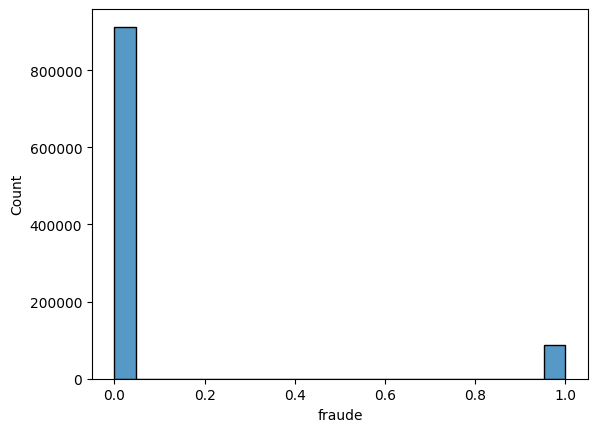

In [ ]:
# Atividade 3: Troque o gráfico de histograma para o countplot.
# O gráfico countplot é o adequado para visulizar variáveis com apenas duas classes.
# realizando um histograma
sns.histplot(df['fraude']);

A partir do histograma, pode-se avaliar que há desbalanceamento nos dados contidos na variável `fraude`.

Se as classes estiverem desbalanceadas execute o código a seguir.

Existem várias técnicas de balanceamento. Como temos muitas observações, vamos usar uma técnica chamada `undersampling`. Esta técnica consiste em descartar observações da classe que possui mais observações até que as duas classes tenham a mesma quantidade.

Por exemplo, se temos duas classes, uma com 1000 observações para a classe A e outra com 100 observações para a classe B, então iremos selecionar apenas 100 observações (aleatoriamente) da classe A dentre as 1000. Dessa maneira iremos ter 100 observações de cada classe.

In [ ]:
# separando as variáveis X e y
X = df[['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online']]
y = df['fraude']

# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

In [ ]:
# verificando se a variável categórica está balanciada (método de visuliazação 1)
y.value_counts()

0.0    87403
1.0    87403
Name: fraude, dtype: int64

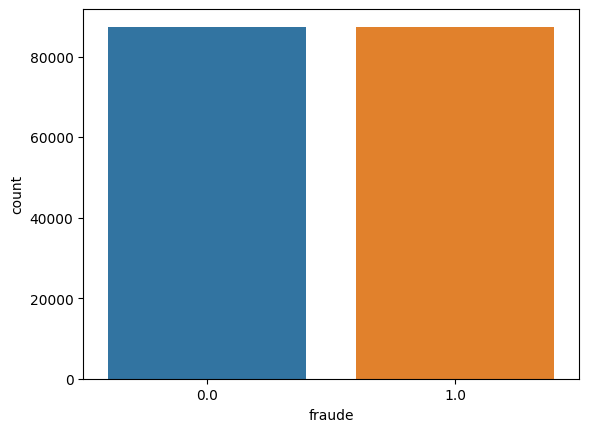

In [ ]:
# verificando se a variável categórica está balanciada (método de visuliazação 2 - gosto mais)
#melhor forma
sns.countplot(x=y);

A variável `fraude` está balanciada.

## Atividade 4: Crie um modelo de regressão logística.

In [ ]:
# importando a biblioteca statsmodels para criar o modelo de regressão logística
# nessa biblioteca precisa incluir o termo contante para o modelo do statsmodels
import statsmodels.api as sm

In [ ]:
# adicionando a constante na variável x
X = sm.add_constant(X)

In [ ]:
# criando modelo de regressão logística
#Logit cria a regressão logística
modelo = sm.Logit(y, X).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.206590
         Iterations 10


Modelo de regressão logística criado.

## Atividade 5: Verifique os parâmetros do modelo e se eles são relevantes.

In [ ]:
#parâmetros do modelo criado
modelo.params

const                    -7.825617
dist_casa                 0.029944
dist_ultima_transacao     0.050708
razao_preco_medio         1.239149
loja_repetida            -1.493660
usou_chip                -1.228818
usou_pin                -10.185854
online                    5.151034
dtype: float64

Todos os parâmetros são relevantes.

## Atividade 6: Crie a matriz de confusão e o mapa de calor correspondente.


In [ ]:
# utilização do modelo para fazer previsão no conjunto x e comprarar com o valor verdadeiro para testar o modelo
# retorna a probabilidade da observação pertencer a classe 1
# valores > 0,5 são jogados para 1; <0,5 jogados para 0
modelo.predict(X)

0         0.012601
1         0.000096
2         0.000016
3         0.005581
4         0.011652
            ...   
174801    0.999728
174802    0.774368
174803    0.525751
174804    1.000000
174805    0.999851
Length: 174806, dtype: float64

In [ ]:
# criando y predito
# True fica = 1 e False fica = 0 (compreensão do Python)
y_pred = (modelo.predict(X) >= 0.5).astype(int)

In [ ]:
# exibindo o resultado de significância para o modelo de regressão logística criado
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:               174806
Model:                          Logit   Df Residuals:                   174798
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.7020
Time:                        21:31:59   Log-Likelihood:                -36113.
converged:                       True   LL-Null:                   -1.2117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.8256      0.055   -143.020      0.000      -7.933      -7.718
dist_casa                 0.0299      0.000    131.015      0.000       0.029       0.030
dist_ult

*   O valor de `Pseudo R-squ`traz a porcentagem de acertos do modelo criado, nesse caso, o modelo acerta para ~70% das compras.
*   Todas as variáveis apresentam P>|z| < 0.5, dessa forma, todas são relevantes para o modelo.
*   Os valores de `coef`são os parâmetros do modelo criado. Valores negativos estão relacionados negativamente a chance de ocorrer fraudes. Valores positivos estão relacionados positivamente a chance de ocorrer fraudes.



In [ ]:
#montando a matriz de confusão da biblioteca sklearn
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[81439,  5964],
       [ 4436, 82967]])

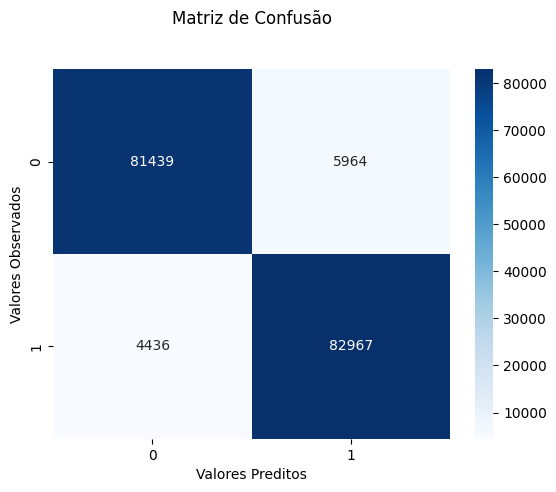

In [ ]:
# criando mapa de calor da matriz de confusão
# fmt = format; d = visualizar digitos inteiros
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

* Verdadeiro positivo (VP): prever casos positivos corretamente - 81472

* Verdadeiro negativo (VN): prever casos negativos corretamente - 82969

* Falso positivo (FP): perver casos positivos incorretamente - 4434

* Falso negativo (FN): prever casos negativos incorretamente - 5931



## Atividade 7: Verifique as outras métricas (sensibilidade, especificidade, f1-score).

In [ ]:
# calculando Acurácia, Valores Positivos Preditos, Valores Negativos Preditos, Recall, Especificidade, f1-score através da biblioteca sklearn
# support retorna a quantidade de observações de uma métrica
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     87403
         1.0       0.93      0.95      0.94     87403

    accuracy                           0.94    174806
   macro avg       0.94      0.94      0.94    174806
weighted avg       0.94      0.94      0.94    174806



*   Podemos ver que a `acurácia` é de 94%, indicando que o modelo acerta 94% das previsões. Note também que ele se sai razoavelmente bem nas duas categorias, indicando que o modelo está bom.
*   A `precisão`, que analisa dentre todas as instância classificadas como positivas, qual é o percentual de acerto, é de 95% para transações verdadeiras e de 93% para fraudes.
*   O `recall`, que analisa dentre todas as instâncias que são de fato positivas, qual é o percentual de acerto, é de 93% para transações verdadeiras e de 95% para fraudes.
*  O `f1-score` conjuga as duas métricas anteriores como uma média harmônica entre ambas. Ela deve sempre ser priorizada para comparar modelos de classificação em relação à acurácia. No nosso modelo, a métrica F1 é de 94%, tanto para transações verdadeiras como para fraudes.


## Atividade 8: Crie a curva ROC para este modelo.

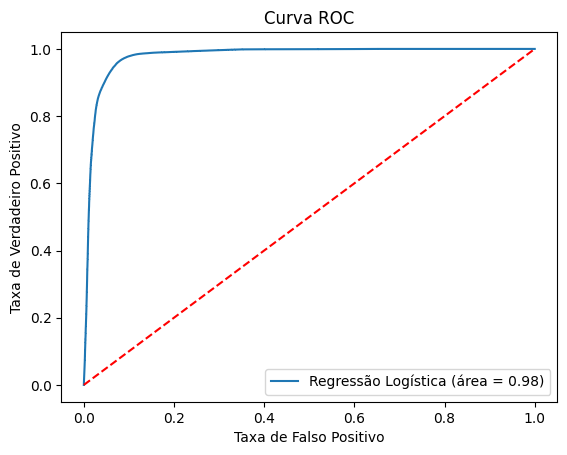

In [ ]:
# criando curva ROC através da biblioteca sklearn
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y, modelo.predict(X))
fpr, tpr, thresholds = roc_curve(y, modelo.predict(X))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

Quanto mais próximo de 1 a área sob a curva ROC estiver, melhor o modelo. No nosso caso a área é de 0.98, indicando que o modelo está bom. Quanto mais próximo da linha tracejada vermelha, pior o modelo.

## Atividade 9: Preveja se uma transação com as características abaixo é ou não fraude.

* `dist_casa = 82`
* `dist_ultima_transacao = 13`
* `razao_preco_medio = 14`
* `loja_repetida = 1`
* `usou_chip = 0`
* `usou_pin = 0`
* `online = 1`

In [ ]:
#conferindo as colunas
df.columns.tolist()

['dist_casa',
 'dist_ultima_transacao',
 'razao_preco_medio',
 'loja_repetida',
 'usou_chip',
 'usou_pin',
 'online',
 'fraude']

In [ ]:
# criando uma lista com os dados da transação para análise do modelo
lista = 1, 82, 13, 14, 1, 0, 0, 1


In [ ]:
# executando o modelo para a transação analisada
modelo.predict(lista)

array([0.99999992])

Quanto mais próximo de 1, sinal que é uma fraude. Neste caso, com 0.99, podemos considerar que é uma transação de fraude.

## Atividade 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema.

In [ ]:
# separando as variáveis X1 e y1
X1 = df[['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online']]
y1 = df['fraude']

In [ ]:
# verificando se a variável categórica está balanciada (mediada divide os dados meio a meio)
y1.value_counts()

0.0    912597
1.0     87403
Name: fraude, dtype: int64

In [ ]:
# adicionando a constante na variável x
X1 = sm.add_constant(X1)

In [ ]:
# criando modelo de regressão logística
#Logit cria a regressão logística
modelo1 = sm.Logit(y1, X1).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.135695
         Iterations 12


In [ ]:
#parâmetros do modelo criado
modelo1.params

const                   -10.361061
dist_casa                 0.015217
dist_ultima_transacao     0.025258
razao_preco_medio         0.862251
loja_repetida            -0.621471
usou_chip                -1.049060
usou_pin                -13.740402
online                    6.651379
dtype: float64

In [ ]:
# utilização do modelo para fazer previsão no conjunto x e comprarar com o valor verdadeiro para testar o modelo
# retorna a probabilidade da observação pertencer a classe 1
# valores > 0,5 são jogados para 1; <0,5 jogados para 0
modelo1.predict(X1)

0         0.000078
1         0.000061
2         0.020542
3         0.007451
4         0.058587
            ...   
999995    0.000025
999996    0.000095
999997    0.005996
999998    0.020837
999999    0.015454
Length: 1000000, dtype: float64

In [ ]:
# criando y1 predito
# True fica = 1 e False fica = 0 (compreensão do Python)
y1_pred = (modelo1.predict(X1) >= 0.5).astype(int)

In [ ]:
# exibindo o resultado de significância para o modelo de regressão logística criado
print(modelo1.summary())

                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999992
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.5423
Time:                        21:32:07   Log-Likelihood:            -1.3570e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -10.3611      0.044   -237.200      0.000     -10.447     -10.275
dist_casa                 0.0152   8.32e-05    182.831      0.000       0.015       0.015
dist_ult

*   O valor de Pseudo R-squtraz a porcentagem de acertos do modelo criado, nesse caso, o modelo acerta para ~54% das compras.
*   Todas as variáveis apresentam P>|z| < 0.5, dessa forma, todas são relevantes para o modelo.
*   Os valores de coefsão os parâmetros do modelo criado. Valores negativos estão relacionados negativamente a chance de ocorrer fraudes. Valores positivos estão relacionados positivamente a chance de ocorrer fraudes.







In [ ]:
#montando a matriz de confusão da biblioteca sklearn
matriz_confusao = confusion_matrix(y1, y1_pred)
matriz_confusao

array([[906272,   6325],
       [ 34837,  52566]])

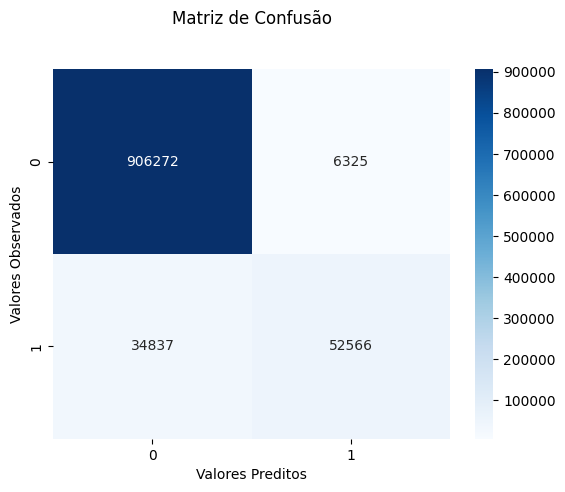

In [ ]:
# criando mapa de calor da matriz de confusão
# fmt = format; d = visualizar digitos inteiros
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');


* Verdadeiro positivo (VP): prever casos positivos corretamente - 906272

* Verdadeiro negativo (VN): prever casos negativos corretamente - 52566

* Falso positivo (FP): perver casos positivos incorretamente - 34837

* Falso negativo (FN): prever casos negativos incorretamente - 6325

In [ ]:
# calculando Acurácia, Valores Positivos Preditos, Valores Negativos Preditos, Recall, Especificidade, f1-score através da biblioteca sklearn
# support retorna a quantidade de observações de uma métrica

print(classification_report(y1, y1_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    912597
         1.0       0.89      0.60      0.72     87403

    accuracy                           0.96   1000000
   macro avg       0.93      0.80      0.85   1000000
weighted avg       0.96      0.96      0.96   1000000



*   Podemos ver que a `acurácia` é de 96%, indicando que o modelo acerta 96% das previsões.
*   A `precisão`, que analisa dentre todas as instância classificadas como positivas, qual é o percentual de acerto, é de 96% para transações verdadeiras e de 89% para fraudes.
*   O `recall`, que analisa dentre todas as instâncias que são de fato positivas, qual é o percentual de acerto, é de 99% para transações verdadeiras e de 60% para fraudes.
*   O `f1-score` conjuga as duas métricas anteriores como uma média harmônica entre ambas. Ela deve sempre ser priorizada para comparar modelos de classificação em relação à acurácia. No nosso modelo, a métrica F1 é de 98% para transações verdadeiras e de 72% para fraudes.

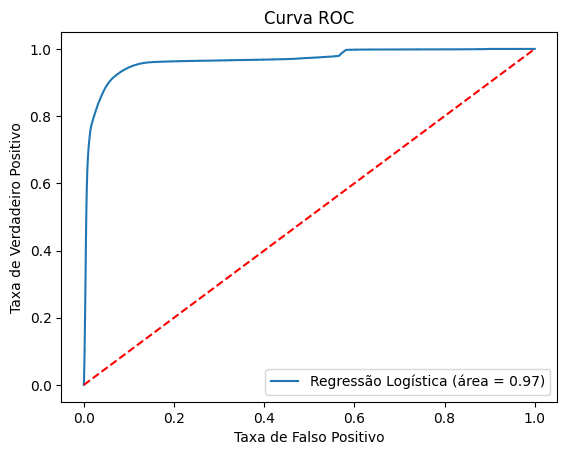

In [ ]:
# criando curva ROC através da biblioteca sklearn
logit_roc_auc = roc_auc_score(y1, modelo1.predict(X1))
fpr, tpr, thresholds = roc_curve(y1, modelo1.predict(X1))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

Quanto mais próximo de 1 a área sob a curva ROC estiver, melhor o modelo. No nosso caso a área é de 0.97, indicando que o modelo está bom. Quanto mais próximo da linha tracejada vermelha, pior o modelo.

**Há graves problemas no modelo sem balanceamento:**
*   O `Pseudo R-squtraz` do `summary` é de apenas 54%
*   Como verificado na matriz de confusão, o modelo acerta um valor baixo para o Verdadeiro negativo (VN), que preve casos negativos corretamente, sendo apenas 52566.
*   Apesar da alta `acurácia`, o `recall` para fraudes é de apenas 60%, indicando que 40% das fraudes passariam pelo modelo criado. O `f1-score` é de 72% para fraudes.
*   Com base no descritivo acima, esse modelo não é indicado para uso.

